In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\vaish\AppData\Local\Temp\ipykernel_16244\1150752203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


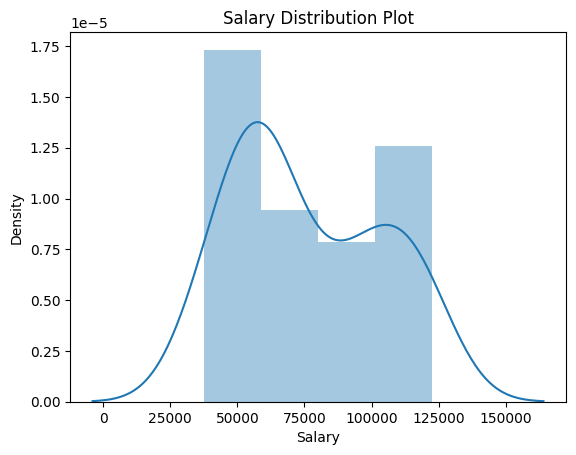

In [4]:
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

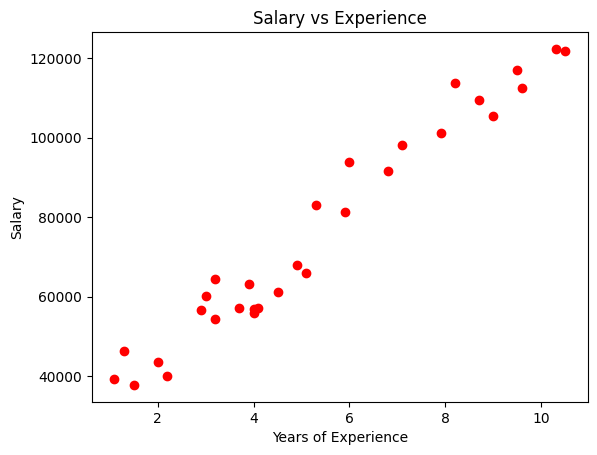

In [5]:
plt.scatter(df_sal['YearsExperience'],df_sal['Salary'], color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box('False')
plt.show()

In [6]:
X = df_sal.iloc[:, :1]  
y = df_sal.iloc[:, 1:]  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred_test = regressor.predict(X_test)     
y_pred_train = regressor.predict(X_train) 

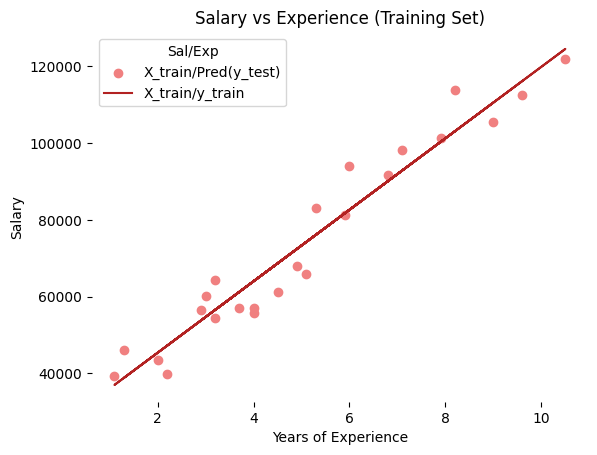

In [10]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()


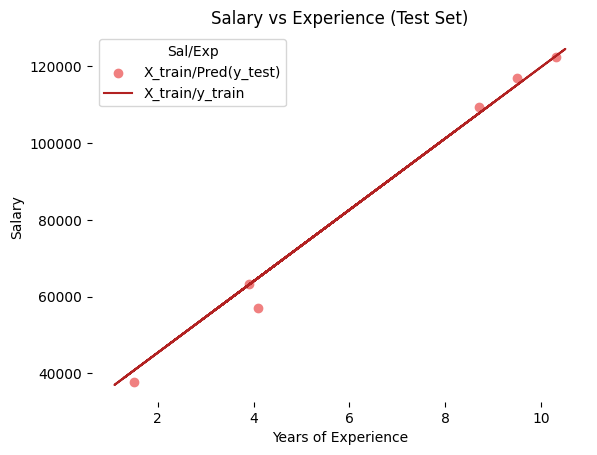

In [11]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [12]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


In [13]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


df_sal = pd.read_csv('Salary_Data.csv')

x = df_sal[['YearsExperience']]  
Y = df_sal[['Salary']]

scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(Y)

m = 9500
b = 26000

Y_pred = m * df_sal['YearsExperience'] + b

Y_pred_scaled = scaler.transform(Y_pred.values.reshape(-1, 1))

mse = mean_squared_error(Y_scaled, Y_pred_scaled)
mae = mean_absolute_error(Y_scaled, Y_pred_scaled)

print("Mean Squared Error (MSE):", round(mse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))

Mean Squared Error (MSE): 0.0044
Mean Absolute Error (MAE): 0.0552


C:\Users\vaish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df_sal = pd.read_csv('Salary_Data.csv')

# Check if data is loaded
print(df_sal.head())

x = df_sal[['YearsExperience']]
Y = df_sal[['Salary']]

scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(Y)

m = 9500
b = 26000

Y_pred = m * df_sal['YearsExperience'] + b

# Ensure Y_pred is not empty and matches Y in length
if len(Y_pred) == len(Y):
    Y_pred_scaled = scaler.transform(Y_pred.values.reshape(-1, 1))

    mse = mean_squared_error(Y_scaled, Y_pred_scaled)
    mae = mean_absolute_error(Y_scaled, Y_pred_scaled)
    rmse = mse ** 0.5
    r2 = r2_score(Y_scaled, Y_pred_scaled)

    print("Mean Squared Error (MSE):", round(mse, 4))
    print("Mean Absolute Error (MAE):", round(mae, 4))
    print("Root Mean Squared Error (RMSE):", round(rmse, 4))
    print("R² Score:", round(r2, 4))
else:
    print("Error: Y_pred and Y have different lengths or Y_pred is empty.")

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Mean Squared Error (MSE): 0.0044
Mean Absolute Error (MAE): 0.0552
Root Mean Squared Error (RMSE): 0.0663
R² Score: 0.9566


C:\Users\vaish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, regressor.predict(X))
print(f'MAE: {mae}')

MAE: 4666.097317261887


In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, regressor.predict(X))
print(f'MSE: {mse}')

MSE: 31484418.55415436


In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

regressor = LinearRegression()
regressor.fit(X, y)

r2 = r2_score(y, regressor.predict(X))
print(f'R^2 Score: {r2}')

R^2 Score: 0.6000000000000001


In [18]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df_sal = pd.read_csv(r"Salary_Data.csv")

x = df_sal[['YearsExperience']]  
Y = df_sal[['Salary']]

scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(Y)

m = 9500
b = 26000

Y_pred = m * df_sal['YearsExperience'] + b

Y_pred_scaled = scaler.transform(Y_pred.values.reshape(-1, 1))

mse = mean_squared_error(Y_scaled, Y_pred_scaled)
mae = mean_absolute_error(Y_scaled, Y_pred_scaled)

rmse = np.sqrt(mse)
r2 = r2_score(Y_scaled, Y_pred_scaled)

print("Mean Squared Error (MSE):", round(mse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))
print("R² Score:", round(r2, 4))

Mean Squared Error (MSE): 0.0044
Mean Absolute Error (MAE): 0.0552
Root Mean Squared Error (RMSE): 0.0663
R² Score: 0.9566


C:\Users\vaish\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
